# Sentiment Analysis

In [5]:
pip install pandas matplotlib seaborn nltk wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

### Download NLTK resources

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load the Dataset

In [10]:
columns = ['id', 'label', 'tweet']
df = pd.read_csv(r'C:\Users\hex\Desktop\Prodigy\4\twitter_training.csv', names=columns, encoding='utf-8')
df.head()

,id,label,tweet
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Sentiment Distribution

In [13]:
# Map labels to sentiment names
df['sentiment'] = df['label'].str.strip().str.capitalize()

In [14]:
print(df[['label', 'sentiment']].head())
print(df['sentiment'].value_counts())

         label sentiment
2401  Positive  Positive
2401  Positive  Positive
2401  Positive  Positive
2401  Positive  Positive
2401  Positive  Positive
sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


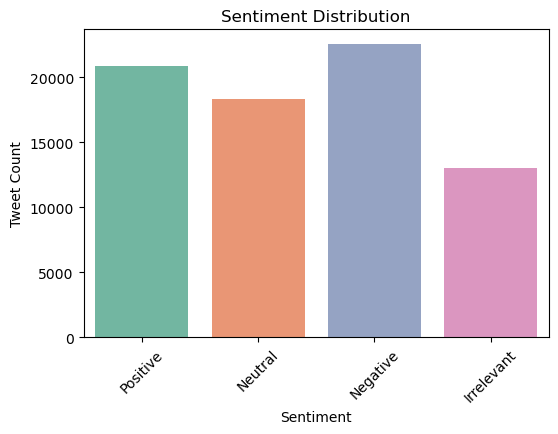

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.show()

### Wordcloud

In [18]:
df = df.dropna(subset=['tweet'])

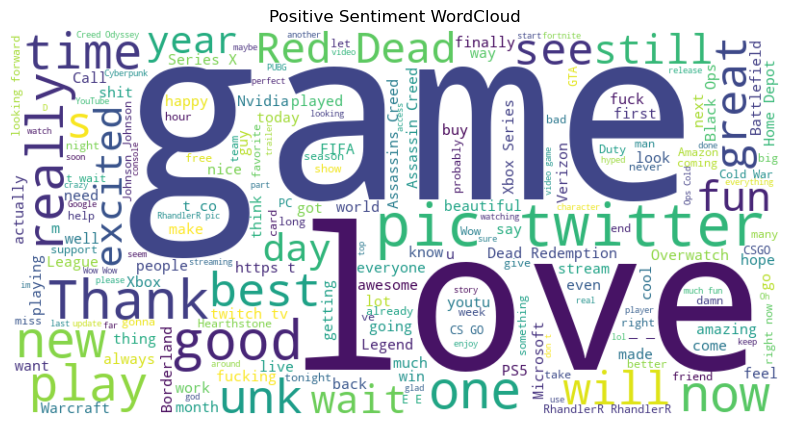

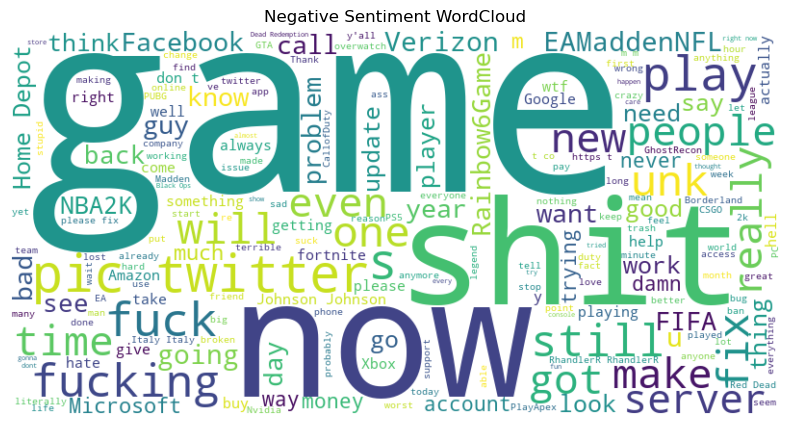

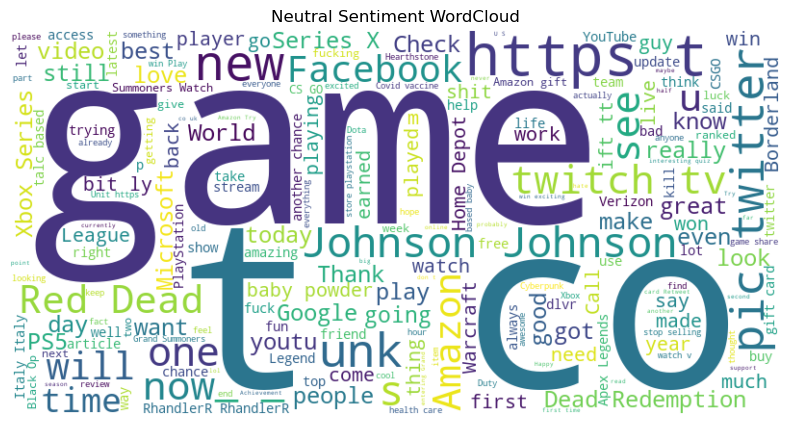

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(sentiment):
    text = " ".join(df[df['sentiment'].str.lower() == sentiment.lower()]['tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment.capitalize()} Sentiment WordCloud")
    plt.show()

generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')